#### Write a Python function that takes an input image of a handwritten digit and applies a series of convolutional and pooling layers to extract features. Then, implement a fully connected layer to classify the digit into one of the 10 possible classes (digits 0-9). Finally, calculate the accuracy of the model on a test set of images.

In [1]:
from tensorflow import keras
import numpy as np 
import pandas as pd 

In [10]:
data = keras.datasets.mnist.load_data()

# exploration of the data

print("Number of images: ", len(data[0][0]))
print("Image shape: ", data[0][0][0].shape)
print("Number of labels: ", len(data[0][1]))
print("Label shape: ", data[0][1][0].shape)


Number of images:  60000
Image shape:  (28, 28)
Number of labels:  60000
Label shape:  ()


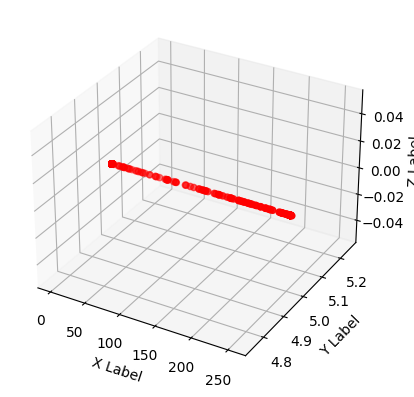

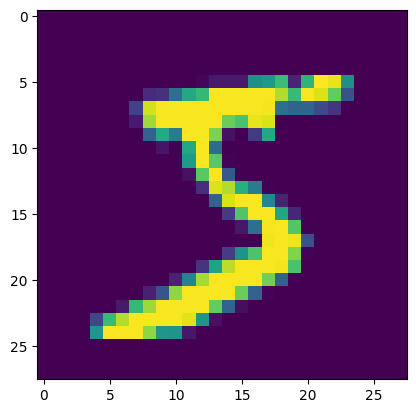

In [15]:
# ploting data 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

def plotting(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
plotting(data[0][0][0], data[0][1][0])

plotting = data[0][0][0].reshape(28,28)
imgplot = plt.imshow(plotting)

In [2]:
(train_images, train_labels), (test_images, test_labels) = data

# Normalize pixel values to be between 0 and 1
def normalize_pixel(image):
    return image / 255.0

train_images = np.array([normalize_pixel(image) for image in train_images])
test_images = np.array([normalize_pixel(image) for image in test_images])

In [3]:
from keras.models import Sequential
# Reshape images from (28, 28) to (28, 28, 1)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

model = Sequential()

In [4]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

# Add first convolutional layer with 32 filters and 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# MaxPooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten layer to feed to Dense layer
model.add(Flatten())

# Add one dense layer of 64 neurons
model.add(Dense(64, activation='relu'))

# Output layer with 10 neurons for 10 classes
model.add(Dense(10, activation='softmax'))

# Compile the model with standard Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(train_images, train_labels, epochs=10)
# Evaluate the model on the testing data
results = model.evaluate(test_images, test_labels)  
# returns loss and accuracy
print(results)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1692 - accuracy: 0.9513
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0600 - accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0405 - accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0151 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0082 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0082 - accuracy: 0.9970
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

1/1 [==============================] - 0s 221ms/step
Predictions:
7
2
1
0
4


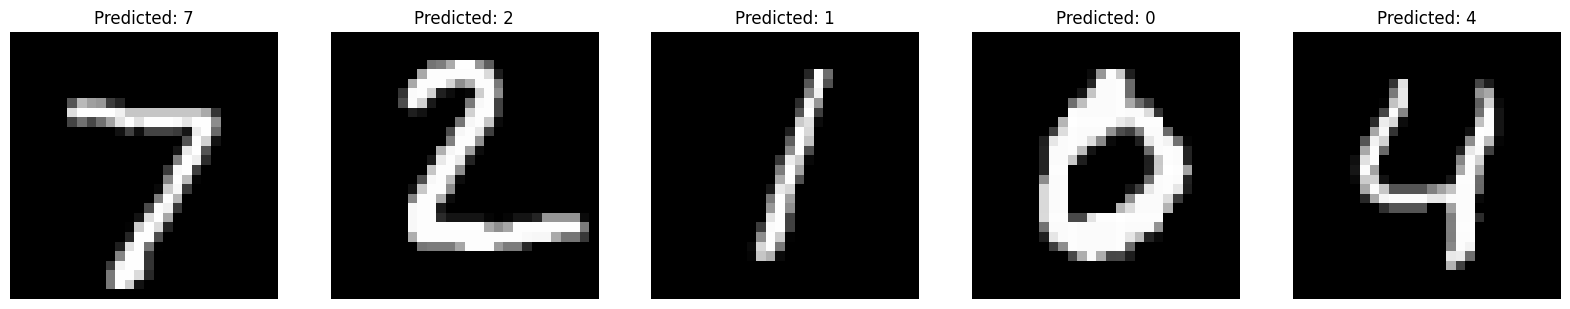

In [8]:
# predict the first 5 test images
predictions = model.predict(test_images[:5])
print("Predictions:")
for i in range(5):
    print(np.argmax(predictions[i]))
    
# plot the first 5 test images with predicted labels
plt.figure(figsize=(20,10))
for j in range(5):
    plt.subplot(1, 5, j+1)
    plt.imshow(test_images[j].reshape(28, 28), cmap='gray')
    plt.title("Predicted: " + str(np.argmax(predictions[j])))
    plt.axis('off')

In [20]:
# the accuracy of the model on a test set of images.
print("Accuracy: ", results[1])

Accuracy:  0.9864000082015991
